**Завдання:**

Побудуйте класифікатор на основі дерева ухвалень рішень, використовуючи датасет ірісів Фішера - тренувальний набір ознак по трьох видах ірісів. 

**1. Завантажимо датасет.**

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
print("Ключі iris: \n{}".format(iris.keys()))

Ключі iris: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


***Відобразивши і проаналізувавши масив, робимо висновок, що масив являє собою словник, де в ключах, що нас цікавлять, знаходяться наступні данні:***
1. 'data' - масив замірів квітів, де стовпці - 4 ознаки, які були заміряни на квітах.
2. 'target' - масив із закодованими у числа сортами вже заміряних квітів.
3. 'target_names' - масив із назвами сортів квітів.
4. 'feature_names' - масив із назвами параметрів, що замірюються.

**2. Відобразимо декілька рядків даних масиву 'data'.**

In [2]:
print('Форма масиву data: {}'.format(iris['data'].shape))
print('Перші десять строк масиву data:\n{}'.format(iris['data'][:10]))

Форма масиву data: (150, 4)
Перші десять строк масиву data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


**3. Сформуємо тестовий та тренувальний датасети**

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=42)

**4. Виконаємо візуальне відображення даних.**

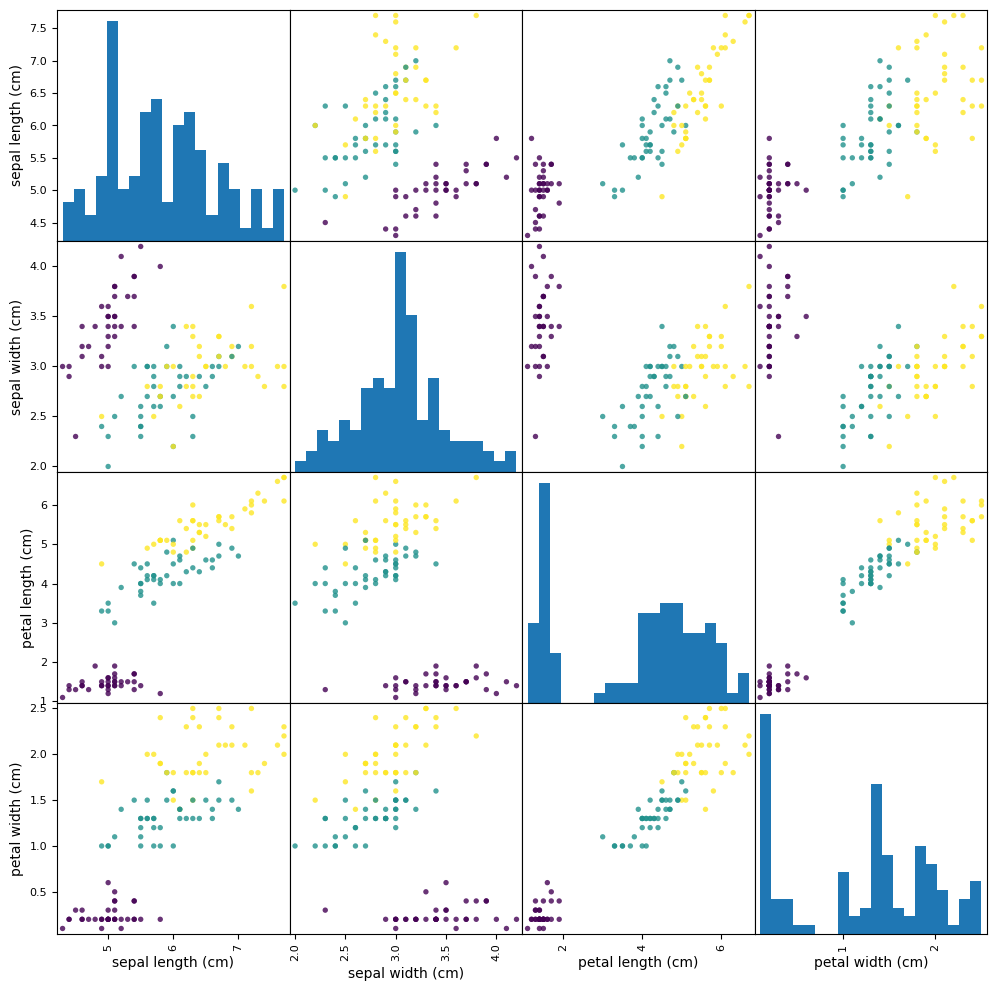

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

iris_dataframe = pd.DataFrame(X_train, columns=iris.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(12, 12), 
                                 hist_kwds={'bins':20}, s=60, alpha=.8)

***В результаті бачимо добре обособлені сорти квітів по усім чотирьом ознакам, що говорить пром можливість побудувати високоякісну модель.***

**5. Побудуємо модель класифікації на основі алгоритму дерева прийняття рішень.** 

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Якість на тренувальному наборі: {:.3f}".format(tree.score(X_train, y_train)))
print("Якість на тестовому наборі: {:.3f}".format(tree.score(X_test, y_test)))

Якість на тренувальному наборі: 1.000
Якість на тестовому наборі: 1.000


**6. Проведемо аналіз моделі дерева рішень.**

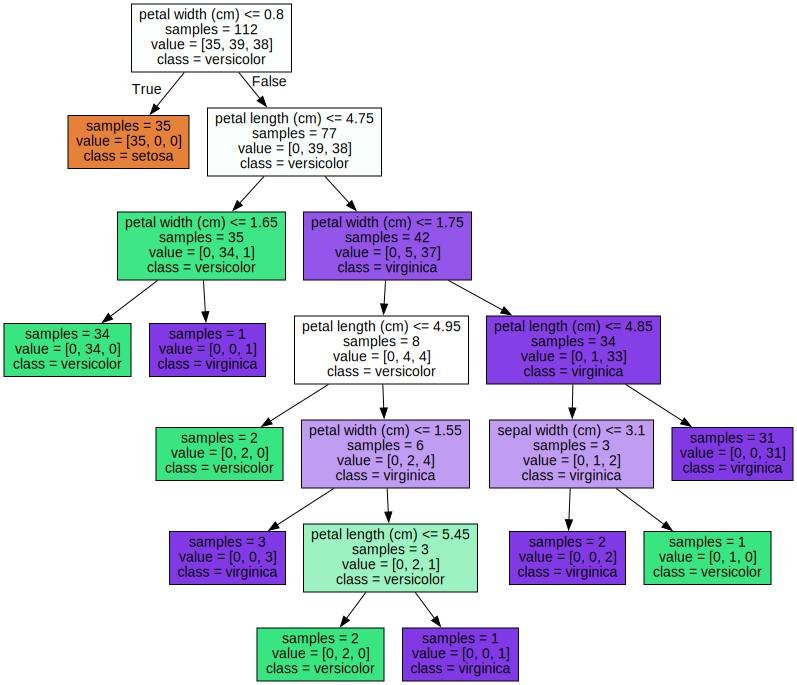

In [7]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names,
                           impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph


***Дана модель дерева прийняття рішень показала свою високу якість на тестових даних. З даної причина, а також у зв'язку
з тим, що у самій моделі лише 6 рівнів, прийнято рішення не обрізати дерево, для запобігання перенавчанню моделі.***

**7. Проведемо аналіз важливості ознак, що використовуються в моделі.**

In [11]:
for name, score in zip(iris["feature_names"], tree.feature_importances_):
    print(name, score)

sepal length (cm) 0.0
sepal width (cm) 0.01787566834251057
petal length (cm) 0.4158189081452329
petal width (cm) 0.5663054235122565


***В результаті бачимо низьке значення параметру "sepal width" (1,7%) і нульове значення параметру "sepal width".
Це свідчить про можливість вдосконалити модель (не використовуючи ці ознаки в моделі), що позитивно відобразиться на швидкості роботи моделі, та мінімально погіршить якість.*** 